# Tugas Besar - IF2220 - Probabilitas dan Statistika

## Soal

Diberikan sebuah data Gandum.csv yang dapat diakses pada utas berikut: Dataset Tugas Besar IF2220. Gandum.csv merupakan data klasifikasi biji gandum yang mengandung 12 kolom sebagai berikut:
1. id
2. Daerah
3. SumbuUtama
4. SumbuKecil
5. Keunikan
6. AreaBulatan
7. Diameter
8. KadarAir
9. Keliling
10. Bulatan
11. Ransum
12. Kelas

Kolom 2-11 adalah kolom atribut (non-target), sedangkan kolom 12 adalah kolom target.
Anda diminta untuk melakukan analisis statistika sebagai berikut:

### 1.Menulis deskripsi statistika (Descriptive Statistics) 
dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

In [115]:
# Import data
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import seaborn as sns
gandum = pd.read_csv("Gandum.csv")
gandum.columns = ['id','Daerah','SumbuUtama','SumbuKecil','Keunikan','AreaBulatan','Diameter','KadarAir','Keliling','Bulatan','Ransum','Kelas']
gandum.head()

,id,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
0,2,4176,109.348294,49.837688,0.890098,4277,72.918093,0.596231,260.346,0.774227,2.194088,1
1,3,4555,114.427991,52.151207,0.890105,4706,76.155145,0.776641,279.606,0.732159,2.194158,1
2,4,4141,108.701190,49.457349,0.890499,4236,72.611879,0.633180,260.478,0.766961,2.197877,1
3,5,5273,122.747868,55.757848,0.890876,5431,81.937733,0.669842,302.730,0.723031,2.201446,1
4,6,5371,123.943530,56.235398,0.891145,5531,82.695644,0.734144,297.114,0.764573,2.204013,1


In [116]:
print("------------- Mean -------------")
print(gandum.mean(numeric_only=True))
print("\n\n")
print("------------- Median -------------")
print(gandum.median(numeric_only=True))
#asumsi NaN tidak bisa menjadi mode
print("\n\n")
print("------------- Mode -------------")
print(gandum.mode(numeric_only=True, dropna=True))
print("\n\n")
print("------------- Std. Deviasi -------------")
print(gandum.std(numeric_only=True))
print("\n\n")
print("------------- Varians -------------")
print(gandum.var(numeric_only=True))
print("\n\n")
print("------------- Range -------------")
gandum_Describe = gandum.describe()
for column in gandum_Describe:
    print(f"{column:12} ", gandum_Describe[column]["max"] - gandum_Describe[column]["min"])
print("\n\n")
print("------------- Minimum -------------")
print(gandum.min(numeric_only=True))
print("\n\n")
print("------------- Maksimum -------------")
print(gandum.max(numeric_only=True))
print("\n\n")
print("------------- IQR -------------")
gandum_Describe = gandum.describe()
for column in gandum_Describe:
    print(f"{column:12} ", gandum_Describe[column]["75%"] - gandum_Describe[column]["25%"])
print("\n\n")
print("------------- Skewness -------------")
print(gandum.skew(numeric_only=True))
print("\n\n")
print("------------- Kurtosis -------------")
print(gandum.kurtosis(numeric_only=True))
print("\n\n")

------------- Mean -------------
id              251.000000
Daerah         4799.282565
SumbuUtama      116.020635
SumbuKecil       53.705716
Keunikan          0.878741
AreaBulatan    4935.010020
Diameter         77.755080
KadarAir          0.648320
Keliling        281.409028
Bulatan           0.761813
Ransum            2.150829
Kelas             1.503006
dtype: float64



------------- Median -------------
id              251.000000
Daerah         4733.000000
SumbuUtama      115.396744
SumbuKecil       53.727453
Keunikan          0.889996
AreaBulatan    4855.000000
Diameter         77.628878
KadarAir          0.625731
Keliling        279.955000
Bulatan           0.761403
Ransum            2.193132
Kelas             2.000000
dtype: float64



------------- Mode -------------
      id  Daerah  SumbuUtama  SumbuKecil  Keunikan  AreaBulatan   Diameter  \
0      2  3992.0   74.133114   39.906517  0.719916       3802.0  71.293564   
1      3  4881.0   74.364021   41.436419  0.725553       49

In [117]:
print("------------- Kuartil -------------")
gandum.describe().loc[['25%','50%','75%']]

------------- Kuartil -------------


,id,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
25%,126.5,4042.5,104.063393,51.192400,0.863673,4166.5,71.743089,0.572602,255.8540,0.732088,1.983917,1.0
50%,251.0,4733.0,115.396744,53.727453,0.889996,4855.0,77.628878,0.625731,279.9550,0.761403,2.193132,2.0
75%,375.5,5492.5,129.055961,56.309070,0.907613,5650.0,83.625761,0.726830,305.7865,0.796387,2.382048,2.0


### 2. Membuat Visualisasi plot distribusi
dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

<b>Daerah</b>

Histogram menunjukkan diagram yang hampir normal meskipun sedikit skew positif. Karena itu, boxplot juga terlihat hampir simetris

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daerah', ylabel='Density'>

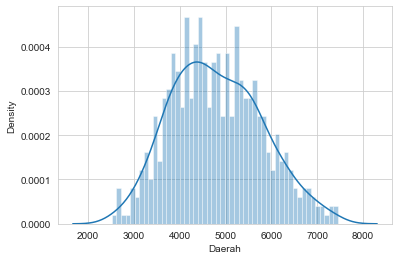

In [118]:
sns.distplot(gandum['Daerah'], hist=True, kde=True, bins=int(50))
# gandum.hist("Daerah")

<AxesSubplot:>

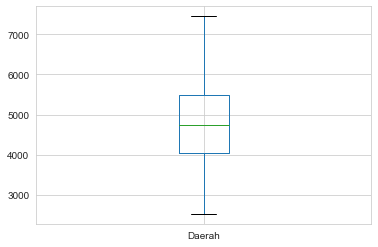

In [119]:
gandum.boxplot("Daerah")

<b>SumbuUtama</b>

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SumbuUtama', ylabel='Density'>

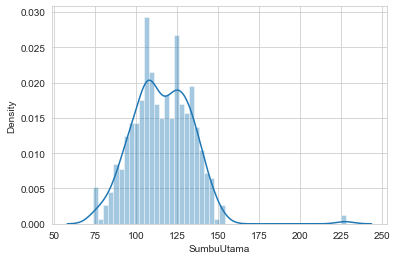

In [120]:
sns.distplot(gandum['SumbuUtama'], hist=True, kde=True, bins=int(50))
# gandum["SumbuUtama"].hist(bins=15)

<AxesSubplot:>

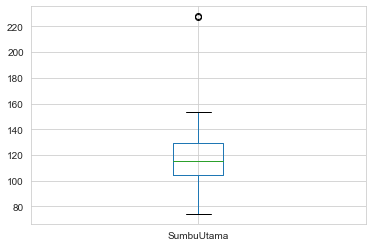

In [121]:
gandum.boxplot("SumbuUtama")

<b>SumbuKecil</b>

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SumbuKecil', ylabel='Density'>

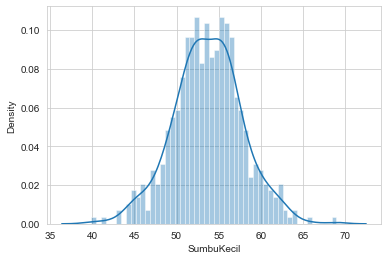

In [146]:
sns.distplot(gandum['SumbuKecil'], hist=True, kde=True, bins=int(50))
# gandum["SumbuKecil"].hist(bins=15)

<AxesSubplot:>

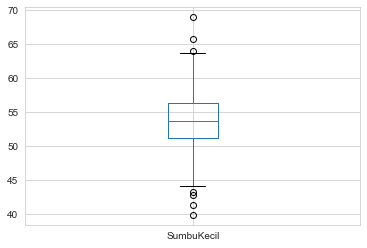

In [123]:
gandum.boxplot("SumbuKecil")

<b>Keunikan</b>

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Keunikan', ylabel='Density'>

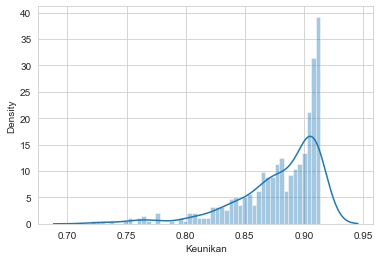

In [124]:
sns.distplot(gandum['Keunikan'], hist=True, kde=True, bins=int(50))
# gandum["Keunikan"].hist(bins=15)

<AxesSubplot:>

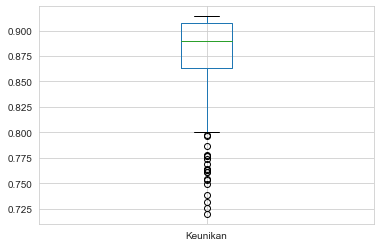

In [125]:
gandum.boxplot("Keunikan")

<b>AreaBulatan</b>

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AreaBulatan', ylabel='Density'>

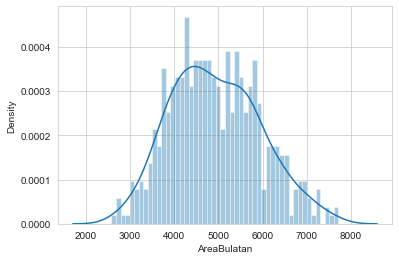

In [126]:
sns.distplot(gandum['AreaBulatan'], hist=True, kde=True, bins=int(50))
# gandum["AreaBulatan"].hist(bins=15)

<AxesSubplot:>

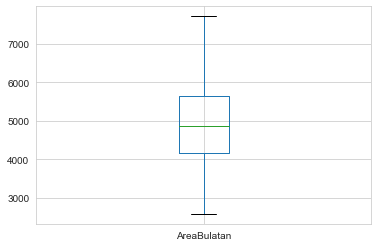

In [127]:
gandum.boxplot("AreaBulatan")

<b>Diameter</b>

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Diameter', ylabel='Density'>

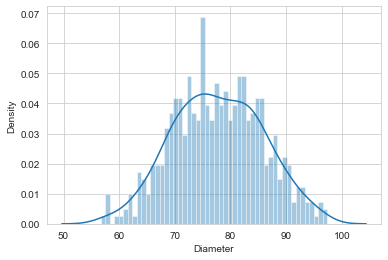

In [128]:
sns.distplot(gandum['Diameter'], hist=True, kde=True, bins=int(50))
# gandum["Diameter"].hist(bins=20)

<AxesSubplot:>

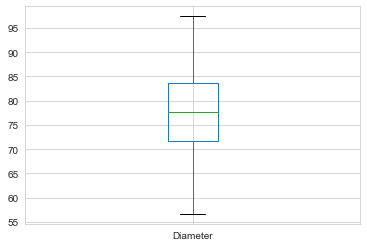

In [129]:
gandum.boxplot("Diameter")

<b>KadarAir</b>

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='KadarAir', ylabel='Density'>

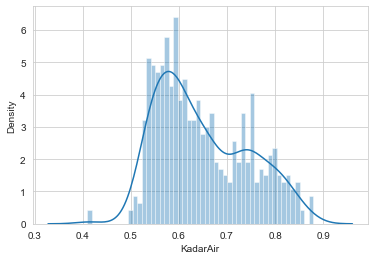

In [130]:
sns.distplot(gandum['KadarAir'], hist=True, kde=True, bins=int(50))
# gandum["KadarAir"].hist()

<AxesSubplot:>

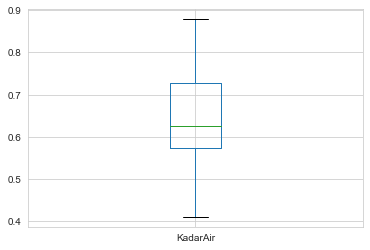

In [131]:
gandum.boxplot("KadarAir")

<b>Keliling</b>

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Keliling', ylabel='Density'>

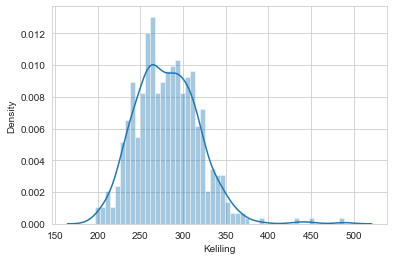

In [132]:
sns.distplot(gandum['Keliling'], hist=True, kde=True, bins=int(50))
# gandum["Keliling"].hist()

<AxesSubplot:>

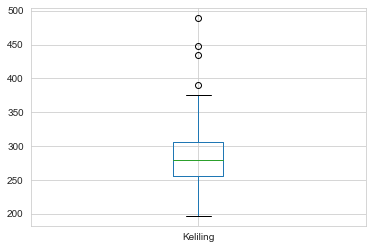

In [133]:
gandum.boxplot("Keliling")

<b>Bulatan</b>

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bulatan', ylabel='Density'>

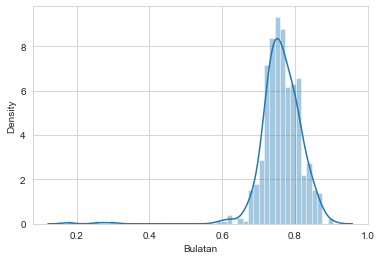

In [134]:
sns.distplot(gandum['Bulatan'], hist=True, kde=True, bins=int(50))
# gandum["Bulatan"].hist()

<AxesSubplot:>

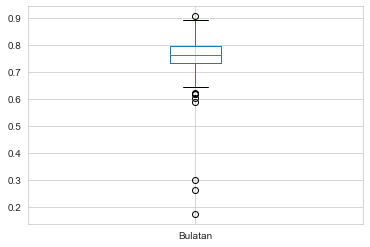

In [135]:
gandum.boxplot("Bulatan")

<b>Ransum</b>

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ransum', ylabel='Density'>

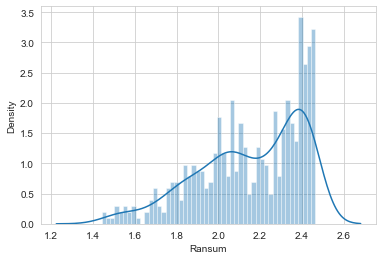

In [145]:
sns.distplot(gandum['Ransum'], hist=True, kde=True, bins=int(50))
# gandum["Ransum"].hist()

<AxesSubplot:>

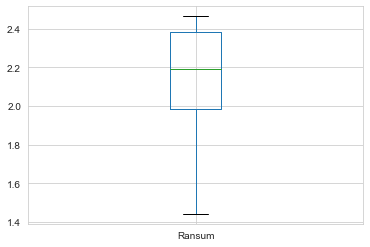

In [137]:
gandum.boxplot("Ransum")

### 3. Menentukan setiap kolom numerik berdistribusi normal atau tidak
Berdasarkan penggambaran histogram yang sudah dilakukan:

**Daerah** berdistribusi normal

**SumbuUtama** tidak berdistribusi normal

**SumbuKecil** berdistribusi normal

**Keunikan** tidak berdistribusi normal

**AreaBulatan** tidak berdistribusi normal

**Diameter** berdistribusi normal

**KadarAir** tidak berdistribusi normal

**Keliling** tidak berdistribusi normal

**Bulatan** tidak berdistribusi normal

**Ransum** tidak berdistribusi normal


### 4. Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing
   menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.<br>
   <ul>
    <li>Nilai rata-rata Daerah di atas 4700?</li>
    <li>Nilai Rata-rata Sumbu Utama tidak sama dengan 116?</li>
    <li>Nilai Rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50?</li>
    <li>Proporsi nilai Diameter yang lebih dari 85, adalah tidak sama dengan 15% ?</li>
    <li>Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5% ?</li>
   </ul>

### 5. Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing 
menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.
<ul>
    <li>Data kolom AreaBulatan dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?</li>
    <li>Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?</li>
    <li>Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?</li>
    <li>Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?</li>
    <li>Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?</li>
</ul>

In [138]:
# testing
data = {'Name':['Tom', 'nick', 'krish', 'jack'],
        'Age':[20, 20, 22, 18]}
df = pd.DataFrame(data)
df_1 = df.iloc[:df['Age'].count()//2,:]
df_2 = df.iloc[-3:,:]
display(df)
display(df_1)
display(df_2)
# print(df_1['Age'].mean())
# print(df_2['Age'].mean())

,Name,Age
0,Tom,20
1,nick,20
2,krish,22
3,jack,18


,Name,Age
0,Tom,20
1,nick,20


,Name,Age
1,nick,20
2,krish,22
3,jack,18


In [139]:
# Membagi dataframe menjadi 2 bagian sama panjang
AreaBulatan1 = gandum.iloc[:gandum['AreaBulatan'].count()//2,:]
AreaBulatan2 = gandum.iloc[gandum['AreaBulatan'].count()//2:,:]
print("Rata-rata")
print("AreaBulatan bagian awal = " + str(AreaBulatan1['AreaBulatan'].mean()))
print("AreaBulatan bagian akhir = " + str(AreaBulatan2['AreaBulatan'].mean()))

Rata-rata
AreaBulatan bagian awal = 5548.180722891566
AreaBulatan bagian akhir = 4324.292


In [140]:
# Membagi dataframe menjadi 2 bagian sama panjang
KadarAir1 = gandum.iloc[:gandum['KadarAir'].count()//2,:]
KadarAir2 = gandum.iloc[gandum['KadarAir'].count()//2:,:]
print("Rata-rata")
print("KadarAir bagian awal = " + str(KadarAir1['KadarAir'].mean()))
print("KadarAir bagian akhir = " + str(KadarAir2['KadarAir'].mean()))

Rata-rata
KadarAir bagian awal = 0.6355894365261044
KadarAir bagian akhir = 0.660999903076


In [141]:
print("Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?")
Bulatan1 = gandum.iloc[:20,:]
Bulatan2 = gandum.iloc[-20:,:]
print("Rata-rata")
print("Bulatan bagian awal = " + str(Bulatan1['Bulatan'].mean()))
print("Bulatan bagian akhir = " + str(Bulatan2['Bulatan'].mean()))

Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?
Rata-rata
Bulatan bagian awal = 0.7363615505
Bulatan bagian akhir = 0.767322437


In [142]:
print("Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?")

Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?


In [143]:
print("Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?")
Diameter1 = gandum.iloc[:gandum['Diameter'].count()//2,:]
Diameter2 = gandum.iloc[gandum['Diameter'].count()//2:,:]
print("Variansi")
print("Diameter bagian awal = " + str(Diameter1['Diameter'].var()))
print("Diameter bagian akhir = " + str(Diameter2['Diameter'].var()))

Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?
Variansi
Diameter bagian awal = 43.30210467515013
Diameter bagian akhir = 39.8282643880772


### 6. Test korelasi
tentukan apakah setiap kolom non-target berkorelasi dengan kolom target, dengan menggambarkan juga scatter plot nya. Gunakan correlation test.

Hasil korelasi kolom non-target dengan kolom Kelas(target)
Daerah        -0.601950
SumbuUtama    -0.712783
SumbuKecil    -0.150982
Keunikan      -0.730641
AreaBulatan   -0.606516
Diameter      -0.601737
KadarAir       0.135040
Keliling      -0.634167
Bulatan        0.544528
Ransum        -0.840430
dtype: float64


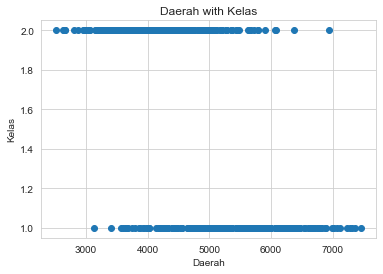

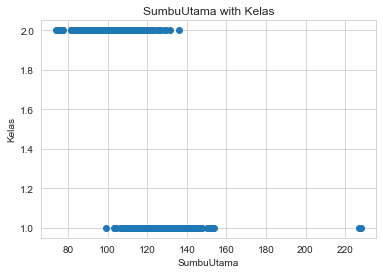

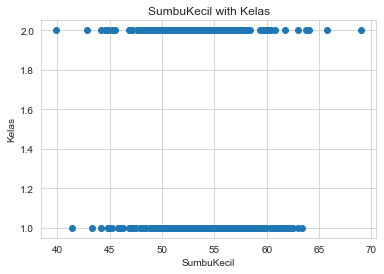

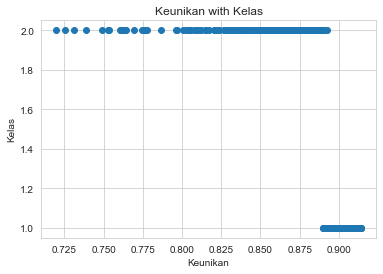

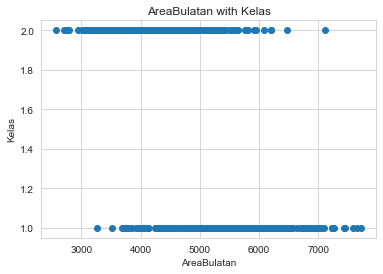

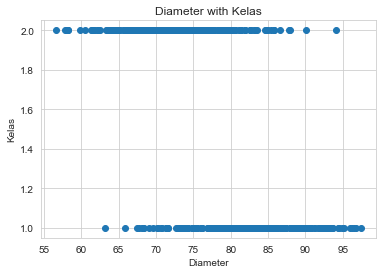

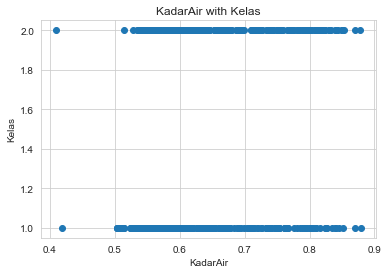

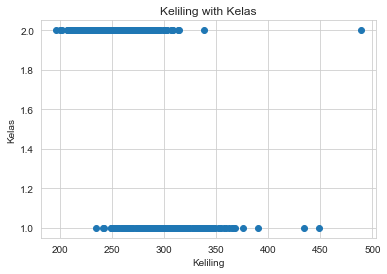

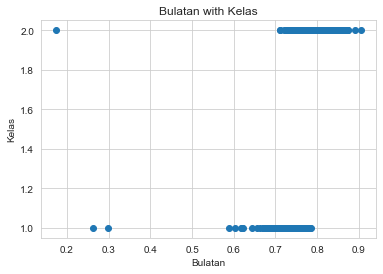

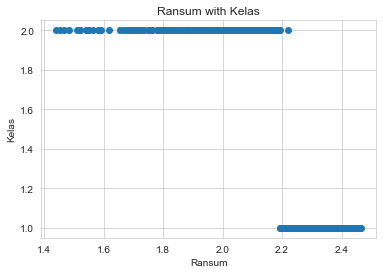

In [144]:
nonTarget = gandum[['Daerah','SumbuUtama','SumbuKecil','Keunikan','AreaBulatan','Diameter','KadarAir','Keliling','Bulatan','Ransum']]
target = gandum['Kelas']
print("Hasil korelasi kolom non-target dengan kolom Kelas(target)")
print(nonTarget.corrwith(target))
for column in nonTarget:
    plt.title(f"{column} with Kelas")
    plt.scatter(x=gandum[column],y=target)
    plt.xlabel(f"{column}")
    plt.ylabel("Kelas")
    plt.show()